 # Data cleaning on Diabetes dataset

In [65]:
#Importing necessary dataset
import pandas as pd
import seaborn as sns

In [4]:
# Read the file
df = pd.read_csv("diabetes_unclean.csv")

In [5]:
#Top records of the dataset
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [7]:
# checking for the number of column
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [15]:
# Rename the column "No_pation" to "patients_No"
df.rename(columns={"No_Pation":"Patients_No"}, inplace=True)

In [16]:
#Confirming the change 
df.columns

Index(['ID', 'Patients_No', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol',
       'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [17]:
# checking for missing values
df.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            1
Urea           1
Cr             2
HbA1c          3
Chol           2
TG             2
HDL            1
LDL            2
VLDL           1
BMI            0
CLASS          0
dtype: int64

In [18]:
#Replace the missing values in the "HbA1c" Column
mean_value = df["HbA1c"].mean()
mean_value

8.284155069582505

In [22]:
# Using the mean value to replace the missing Records
df["HbA1c"].fillna(mean_value, inplace=True)

In [23]:
#Confirming the change 
df.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            1
Urea           1
Cr             2
HbA1c          0
Chol           2
TG             2
HDL            1
LDL            2
VLDL           1
BMI            0
CLASS          0
dtype: int64

In [30]:
# Dropping the missing values of other columns
df1=df.dropna()
df1=df.isnull().sum()

In [31]:
# check for information about the dataset
df1.info()

<class 'pandas.core.series.Series'>
Index: 14 entries, ID to CLASS
Series name: None
Non-Null Count  Dtype
--------------  -----
14 non-null     int64
dtypes: int64(1)
memory usage: 224.0+ bytes


In [37]:
df.head(1010)

,ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.900000,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.900000,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,191,454316,M,55.0,NaN,62.0,6.800000,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,192,454316,M,55.0,4.8,88.0,8.284155,5.7,4.0,0.9,3.3,1.8,30.0,Y
1006,193,454316,M,62.0,6.3,82.0,6.700000,5.3,2.0,1.0,3.5,NaN,30.1,Y
1007,194,454316,F,57.0,4.1,70.0,9.300000,5.3,3.3,1.0,1.4,1.3,29.0,Y


In [39]:
# check for the Unique values in the "CLASS" column
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [58]:
#To clean the class column, i replace the Uniques values
df["CLASS"]=df["CLASS"].str.replace("Y ","Y")

In [60]:
#To confirm the change 
df["CLASS"].unique()

array(['N', 'N ', 'P', 'Y'], dtype=object)

In [61]:
#To clean the class column, i replace the Uniques values
df["CLASS"]=df["CLASS"].str.replace("N ","N")

In [62]:
#To confirm the change 
df["CLASS"].unique()

array(['N', 'P', 'Y'], dtype=object)

<AxesSubplot:xlabel='Cr'>

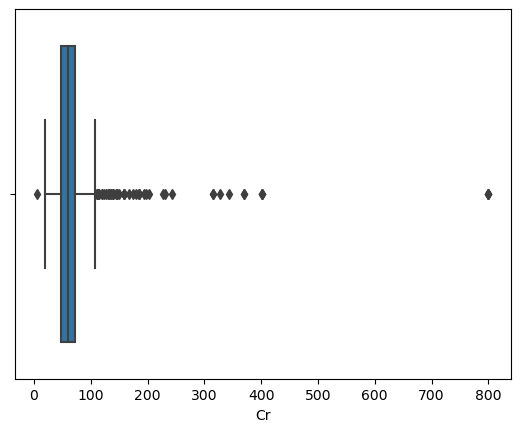

In [68]:
#Checking for outliers in the dataset
sns.boxplot(df["Cr"])

In [71]:
#choose the maximum quantile to fill in the outliers 
max_Cr =df["Cr"].quantile(0.993)
max_Cr


370.0

In [72]:
df[df["Cr"]> max_Cr]

,ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
273,1,34325,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
283,266,24060,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
589,136,7747,F,61.0,24.0,401.0,7.0,4.3,2.9,0.4,2.7,1.3,30.0,Y
590,363,34455,F,55.0,24.0,401.0,6.3,4.3,2.9,0.4,2.7,1.3,28.0,Y
592,540,2570,F,61.0,24.0,401.0,7.0,4.3,2.9,0.4,2.7,1.3,36.6,Y
846,1,34325,M,56.0,20.8,800.0,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
860,19,51623,M,60.0,20.8,800.0,9.0,2.3,1.1,0.9,0.9,0.5,33.0,Y


In [80]:
# Assiging the new data to a new data
df1=df[df["Cr"]< max_Cr]

<AxesSubplot:xlabel='Cr'>

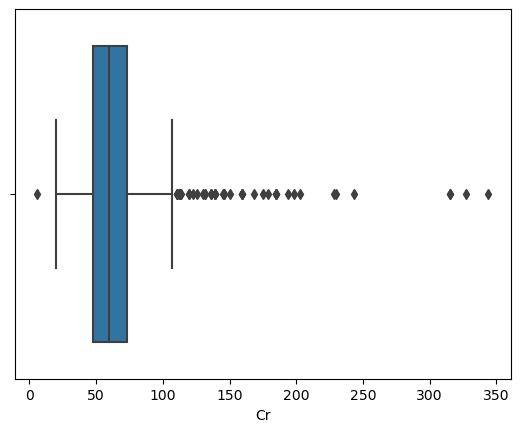

In [81]:
#To confirm the change 
sns.boxplot(df1["Cr"])

In [83]:
#checking for duplicate 
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1004    False
1005    False
1006    False
1007    False
1008     True
Length: 998, dtype: bool

In [84]:
#saveing the new dataset into csv
df1.to_csv("cleaned_data2.csv")